<a href="https://colab.research.google.com/github/malickl/Projet_MachineLearning/blob/main/RenduFinal_MachineLearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

# Exploration du Dataset

In [4]:
df = pd.read_csv("/content/bienetre.csv")

In [5]:
df.head(10)

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
0,1,76.378818,172.472900,93.637574,2317.284189,23.187146,2.524067,24.544095,5.805570,1.0,...,4.0,6.128322,7.656376,129.058650,229.004516,4.483552,6.716421,46.007184,71.051570,4.829417
1,1,39.629339,162.527782,88.071856,2740.909189,26.742305,3.136856,26.805875,3.970287,1.0,...,1.0,6.068320,5.100178,121.038768,243.170215,4.908961,4.725666,42.880652,64.900618,5.994971
2,0,36.506832,196.457696,85.160759,3541.036636,20.895824,4.282662,24.218407,2.312967,0.0,...,3.0,6.503321,8.053128,108.250192,271.242294,7.003758,8.882047,23.152283,87.163500,8.123009
3,1,50.016190,174.829299,72.362368,3093.794975,26.155986,3.007974,23.452811,5.387465,0.0,...,3.0,6.015851,5.903230,124.828110,219.509215,4.570111,5.592381,51.413594,72.278489,6.326265
4,1,60.743330,171.536491,54.874865,2113.805284,14.771488,2.780533,26.065223,6.859302,1.0,...,3.0,5.344601,6.297733,117.464818,224.681593,5.145483,5.162349,47.531057,72.340850,4.493604
5,1,40.741101,168.518107,68.888008,2934.514138,7.091304,3.242791,25.761617,4.348485,2.0,...,1.0,5.873392,7.863249,122.445217,215.240199,4.840909,5.921237,38.301720,66.863404,4.385543
6,0,42.356146,170.135636,83.511471,2307.222928,20.285308,4.337167,21.993124,3.395775,2.0,...,2.0,7.943628,8.628902,110.615629,168.487719,9.273972,7.604439,11.774270,85.037682,7.366709
7,1,51.494561,157.098326,73.584389,2122.499567,17.579189,2.984603,26.219110,4.328846,2.0,...,3.0,5.616177,5.527979,117.963838,185.053871,6.165609,4.163455,49.167511,66.560262,5.585149
8,1,56.832124,145.786202,79.239677,2419.864851,16.008497,3.033971,24.550901,4.246365,3.0,...,2.0,5.033962,8.372298,130.159196,210.890333,4.726495,5.872847,47.165292,73.633004,5.851542
9,0,39.444523,165.406759,58.098250,3876.578305,18.741868,3.948909,23.075506,3.228741,1.0,...,3.0,8.139389,8.910141,114.589727,145.538174,6.696522,9.611936,27.261322,90.895844,6.878945


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        10000 non-null  int64  
 1   age           10000 non-null  float64
 2   taille        10000 non-null  float64
 3   poids         10000 non-null  float64
 4   revenu        10000 non-null  float64
 5   experience    10000 non-null  float64
 6   education     10000 non-null  float64
 7   imc           10000 non-null  float64
 8   stress        10000 non-null  float64
 9   nb_enfants    10000 non-null  float64
 10  depenses      10000 non-null  float64
 11  exercice      10000 non-null  float64
 12  alimentation  10000 non-null  float64
 13  sommeil       10000 non-null  float64
 14  pression      10000 non-null  float64
 15  cholesterol   10000 non-null  float64
 16  activite      10000 non-null  float64
 17  satisfaction  10000 non-null  float64
 18  risque        10000 non-nul

Aucune valeur manquante

In [7]:
df.describe()

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.800000,47.978640,170.535341,74.042819,2796.214262,19.032658,3.299494,25.621232,4.598669,1.836000,...,2.626100,6.402255,7.195132,123.047003,204.035817,5.796017,6.393817,44.145412,73.824255,6.402144
std,0.748369,12.457695,10.114769,13.341103,781.533488,6.242550,0.779620,3.380089,1.807880,1.217396,...,1.543353,1.804730,1.231426,12.549389,30.366382,2.163302,1.789406,24.605016,17.215520,1.797726
min,0.000000,7.587327,129.436247,31.449135,275.978543,-6.476955,1.000000,16.595884,-0.817043,0.000000,...,0.000000,1.000000,2.773131,79.364067,113.800424,1.000000,1.000000,0.000000,16.932014,0.699666
25%,0.000000,39.405573,163.740683,64.729830,2204.563230,14.697224,2.718558,23.240084,3.197705,1.000000,...,1.000000,5.101108,6.369437,114.360830,181.995873,4.113038,5.129324,23.080978,60.948984,5.114500
50%,1.000000,47.619796,170.490729,73.192735,2757.064229,18.971618,3.278090,25.314537,4.489886,2.000000,...,3.000000,6.502440,7.214413,122.755603,202.548092,5.651046,6.484931,43.577995,76.565336,6.499488
75%,1.000000,56.637883,177.275880,82.251508,3381.817122,23.292222,3.890786,27.579416,5.882468,3.000000,...,4.000000,7.805253,8.051258,131.595146,225.125376,7.684186,7.766372,60.885159,88.778946,7.787756
max,2.000000,93.773829,214.790843,140.374368,5363.916672,40.327629,5.000000,40.608144,10.605591,7.000000,...,8.000000,10.000000,11.331989,167.334076,305.815869,10.000000,10.000000,100.000000,100.000000,10.000000


[]

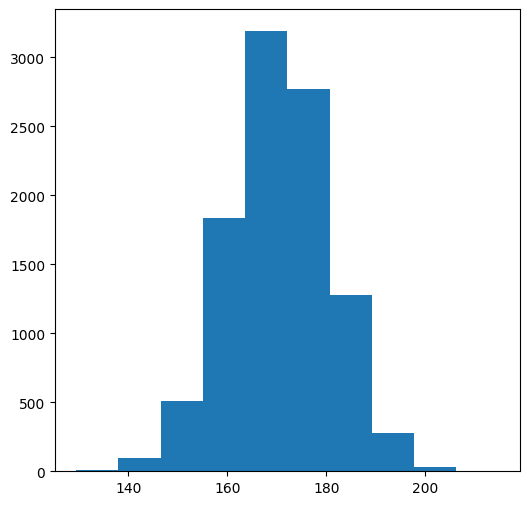

In [8]:
plt.figure(figsize=(6,6))
plt.hist(df.taille)
plt.plot()

In [9]:
def histogram(df):
  for col in df.columns:
    plt.figure(figsize=(6,6))
    plt.hist(df[col])
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquennce")
    plt.plot()

def boxplot(df):
  for col in df.columns:
    plt.figure(figsize=(6,6))
    plt.boxplot(df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquennce")
    plt.plot()

<ipython-input-9-679a4c244d20>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))


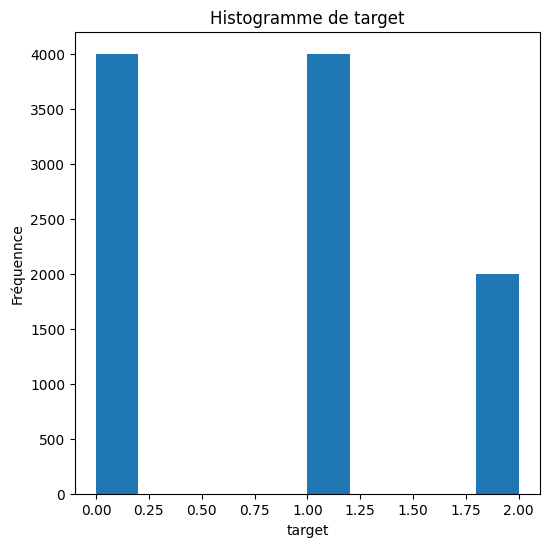

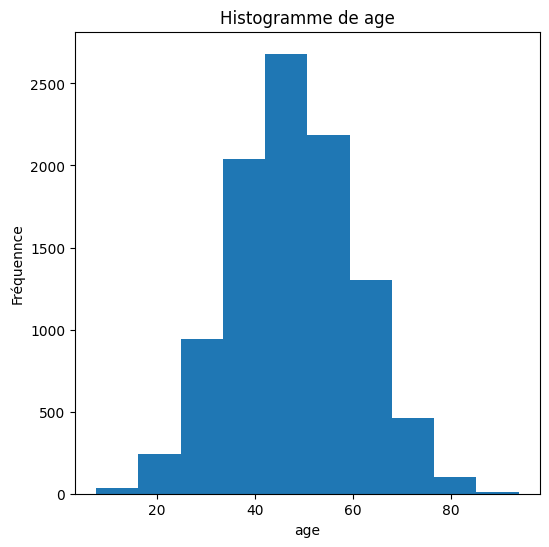

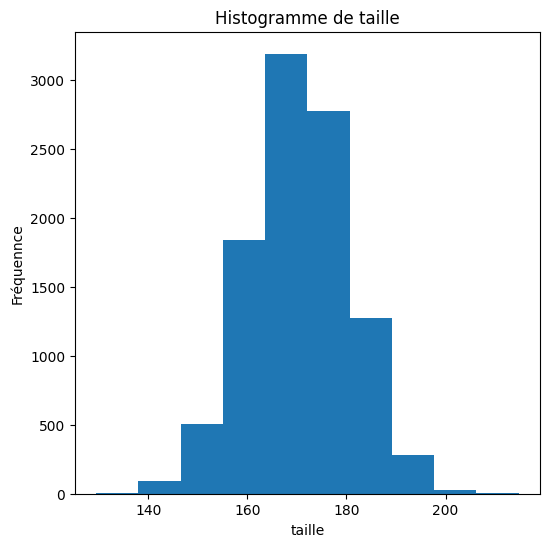

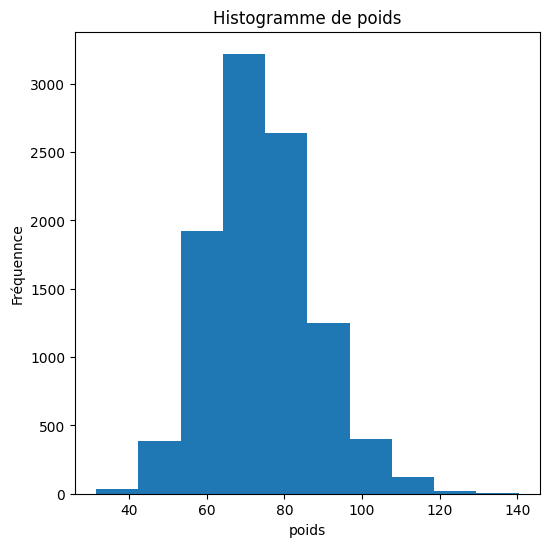

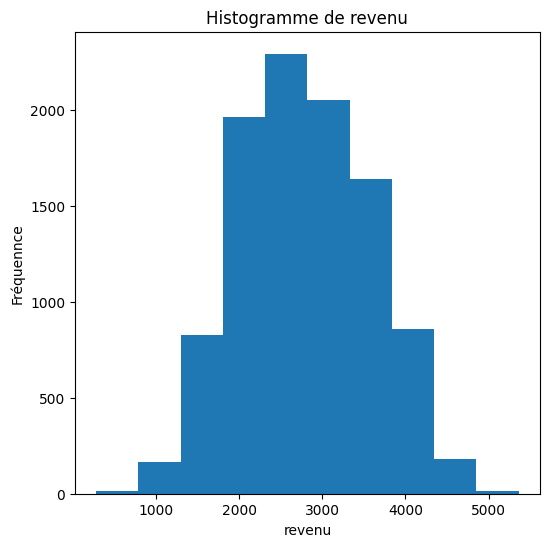

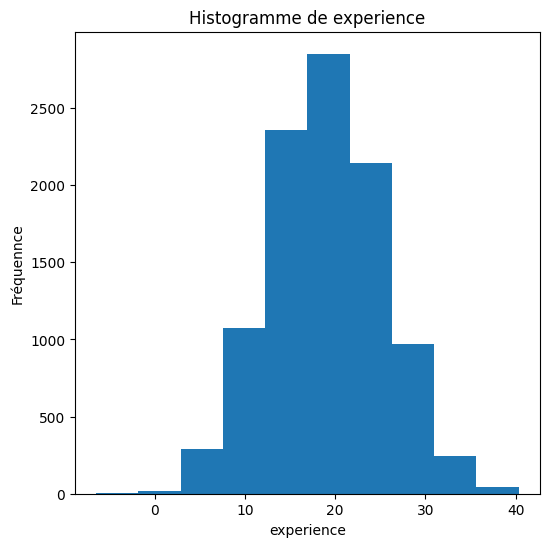

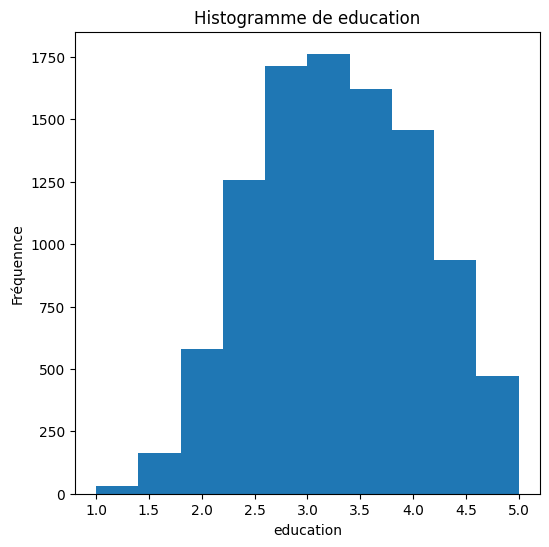

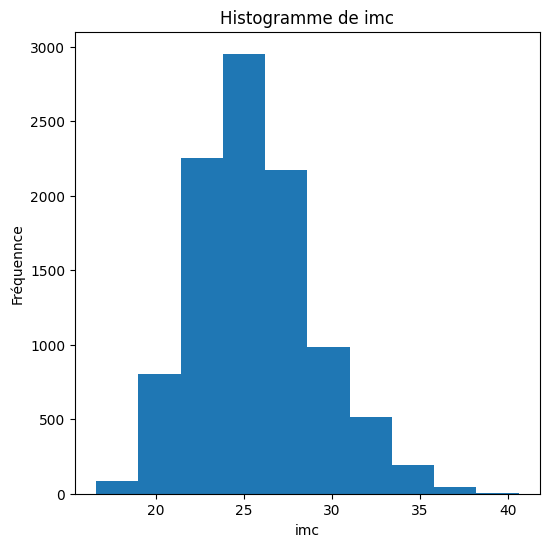

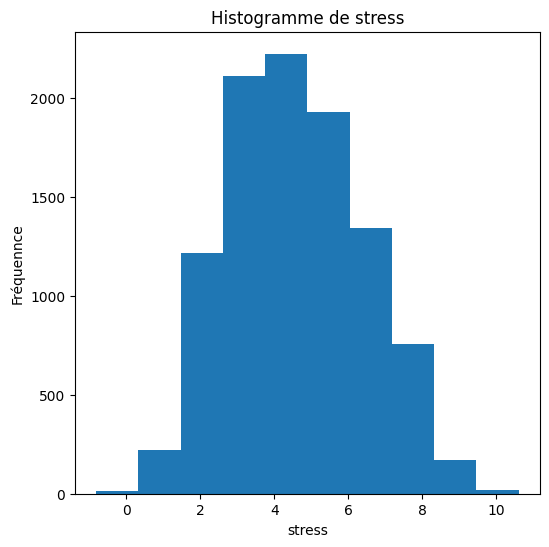

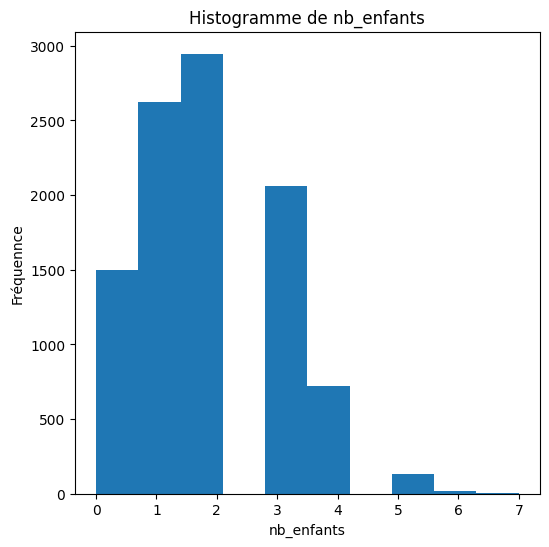

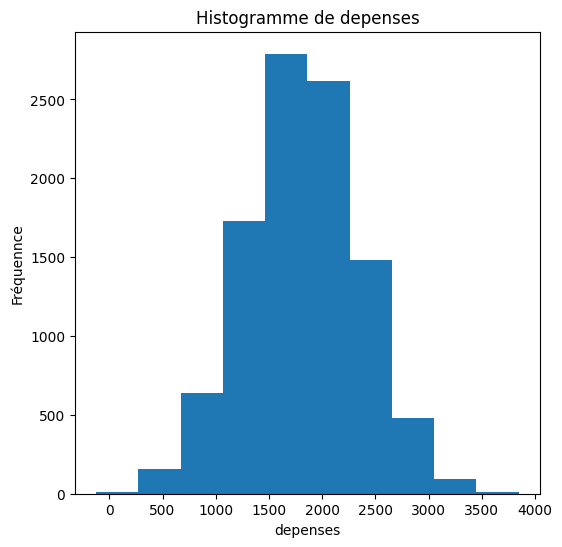

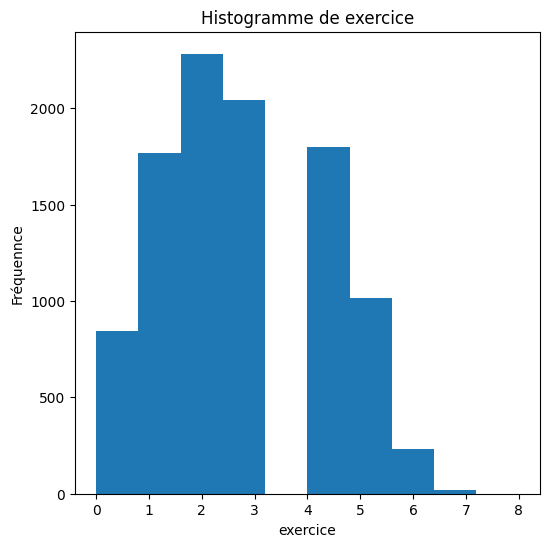

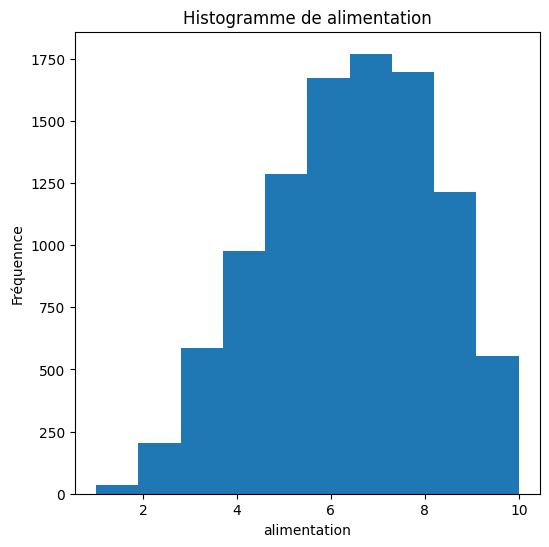

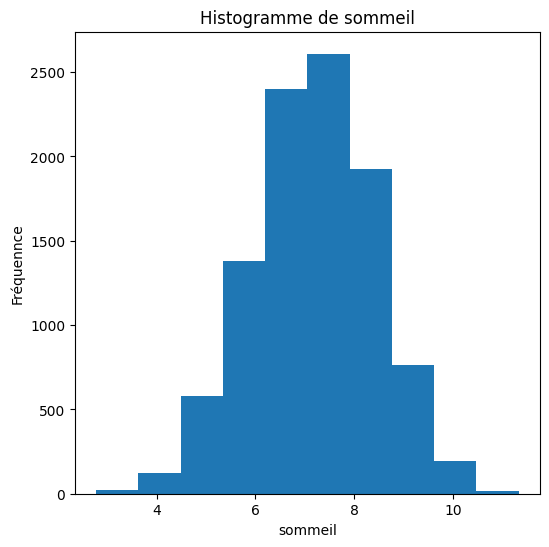

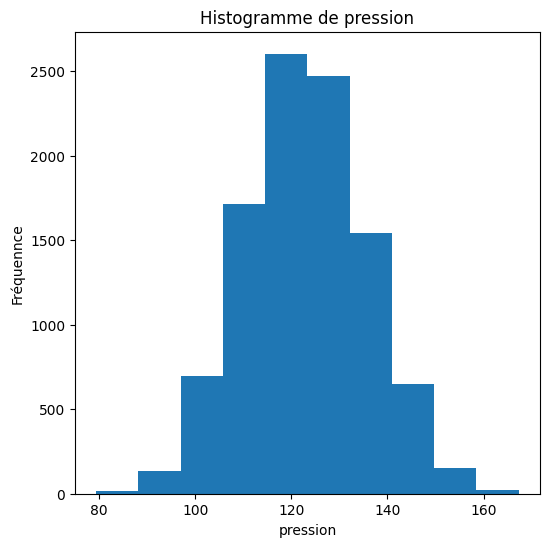

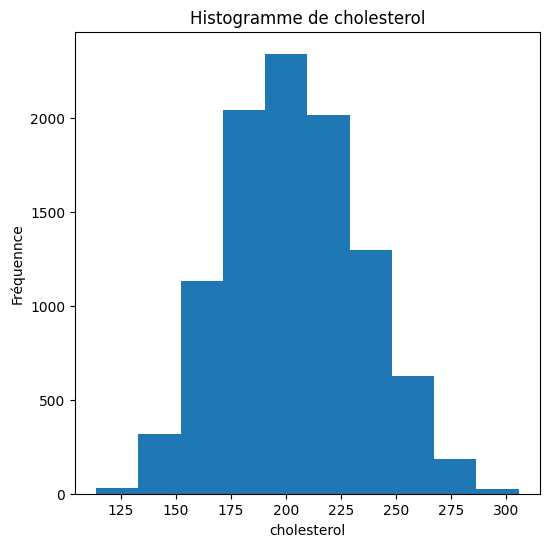

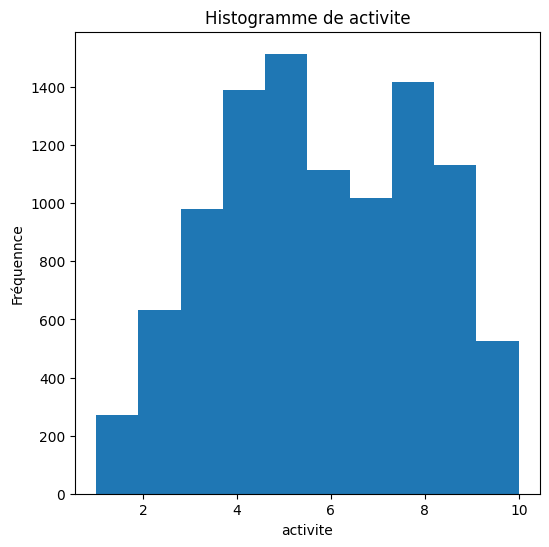

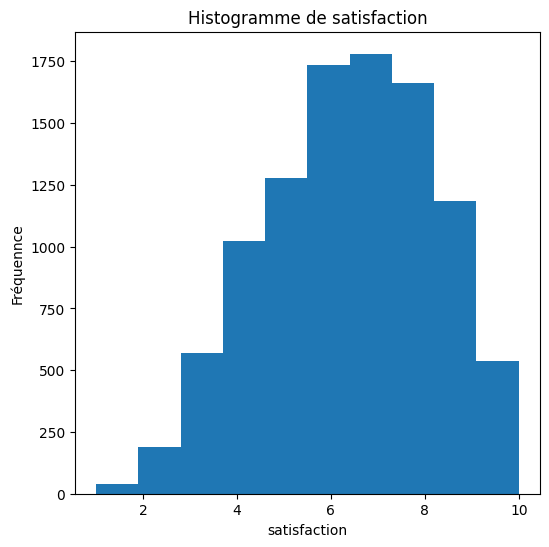

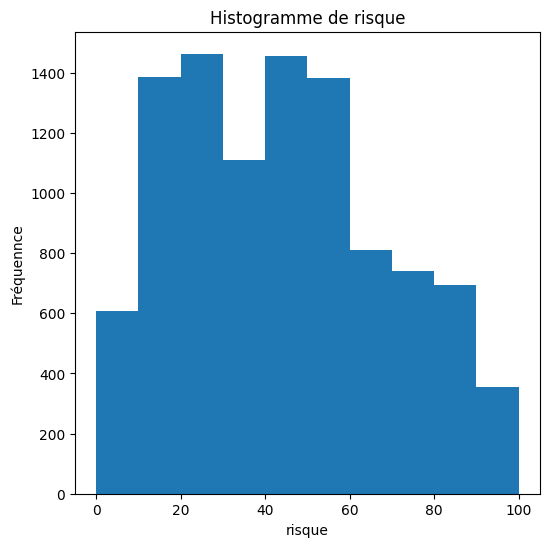

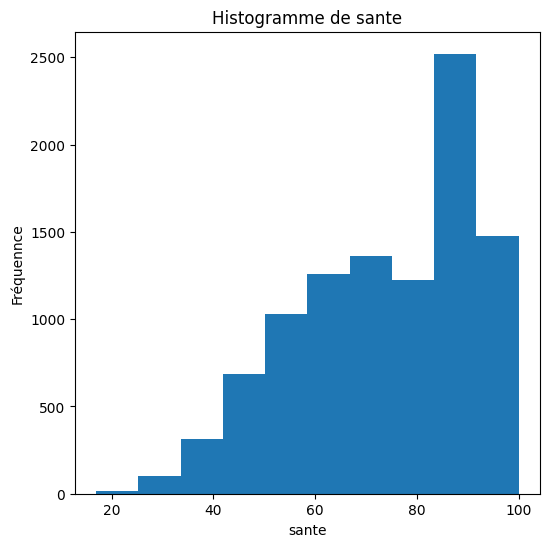

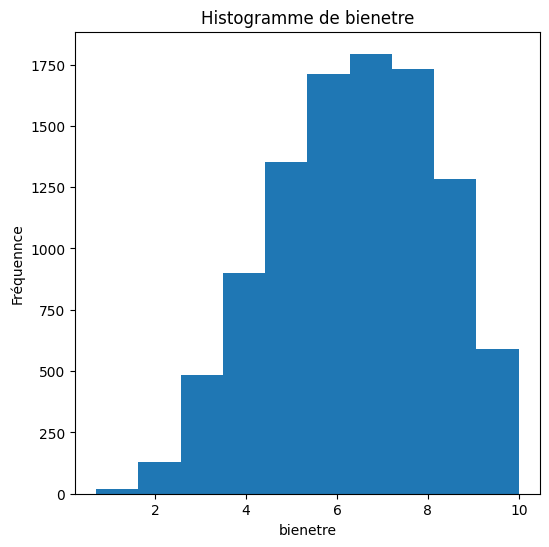

In [10]:
histogram(df)

<ipython-input-9-679a4c244d20>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))


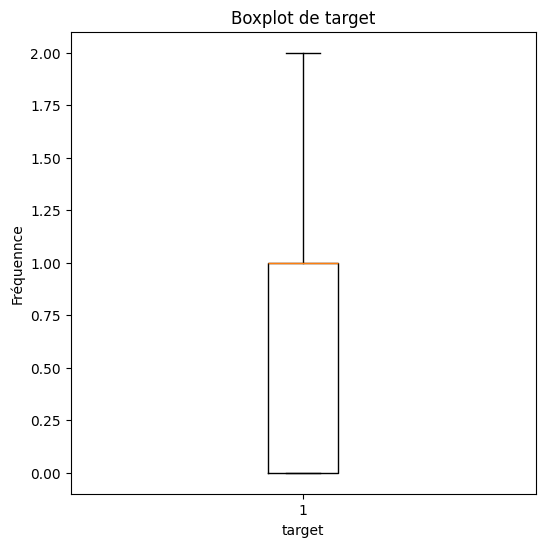

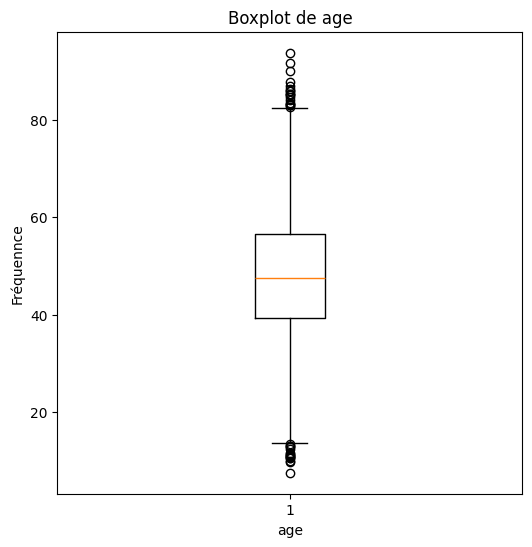

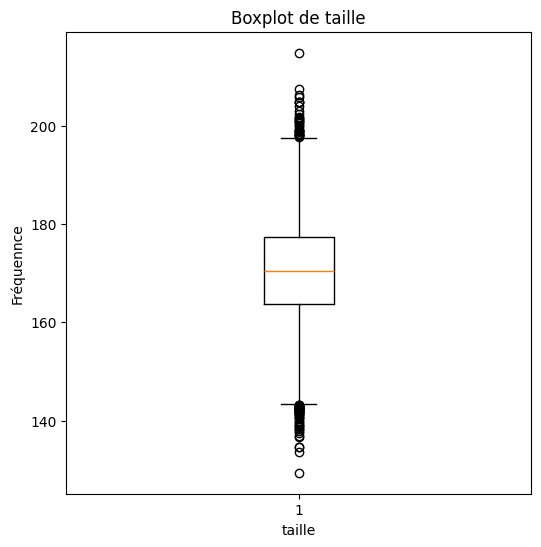

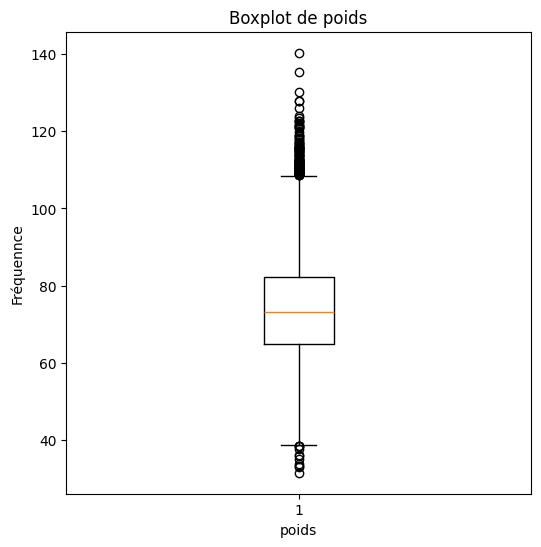

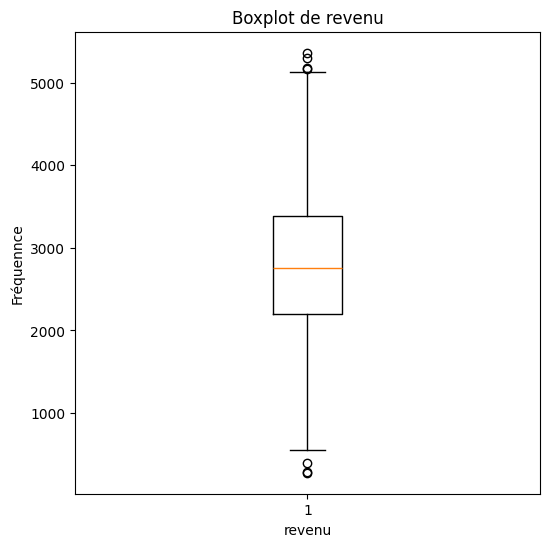

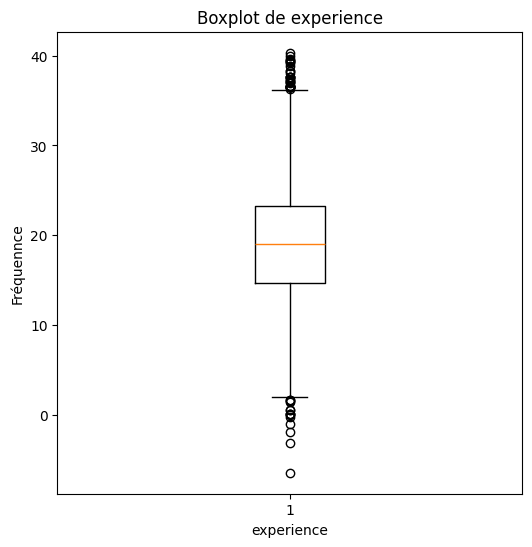

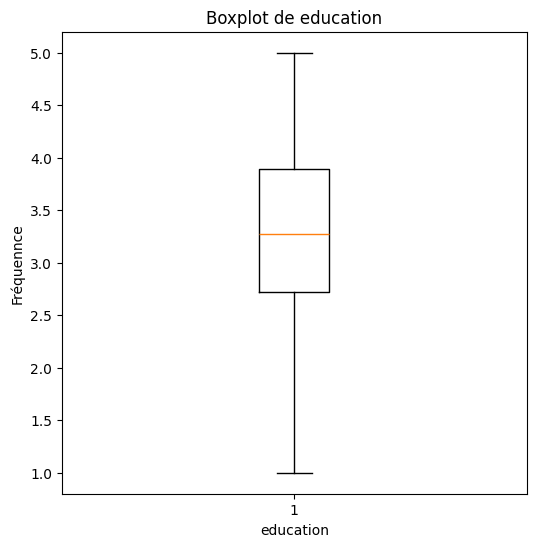

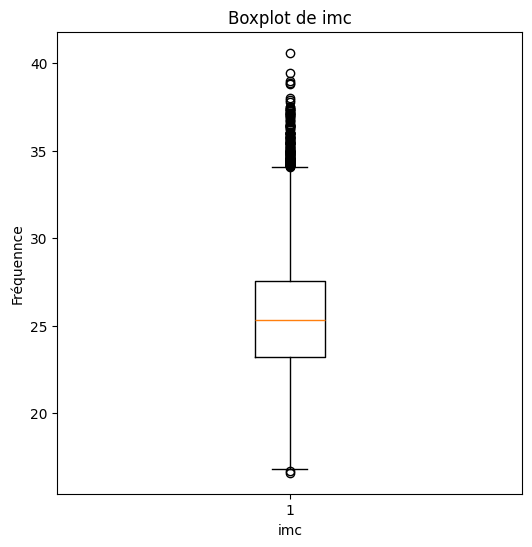

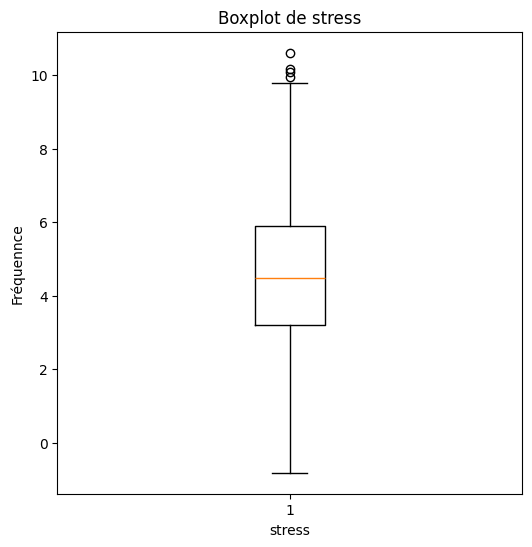

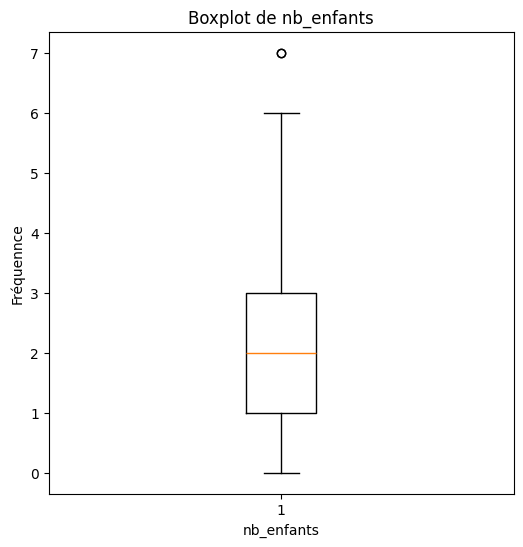

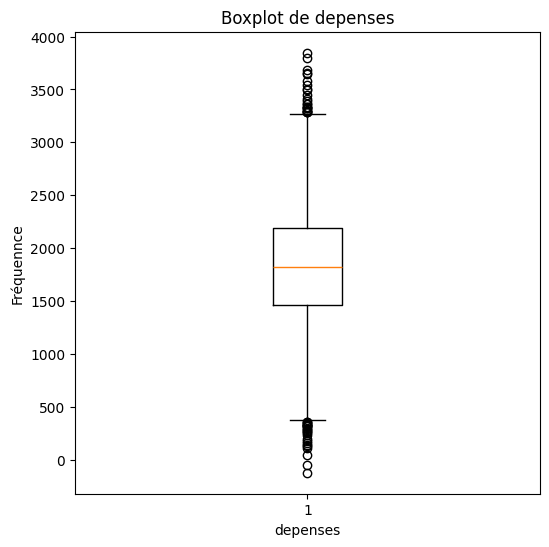

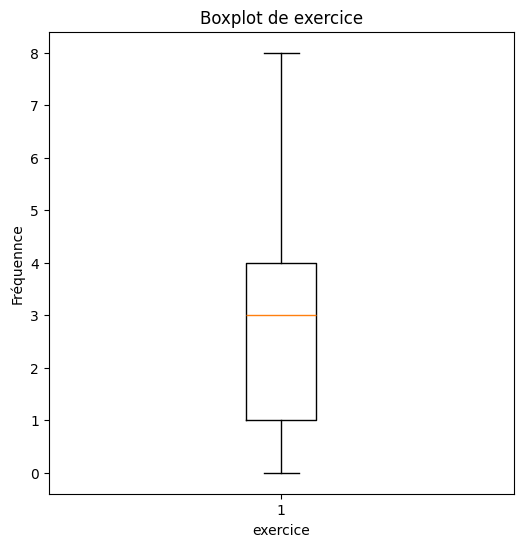

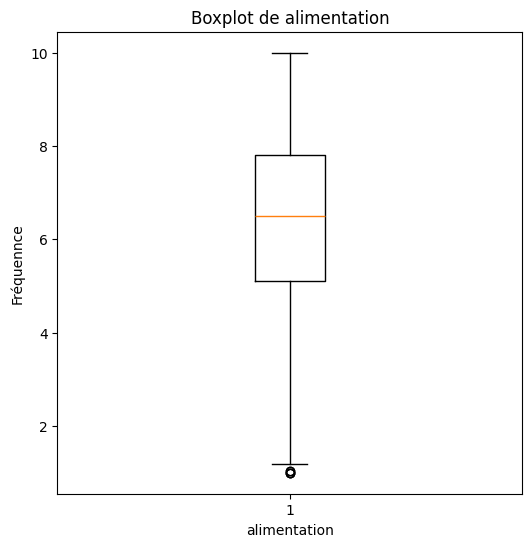

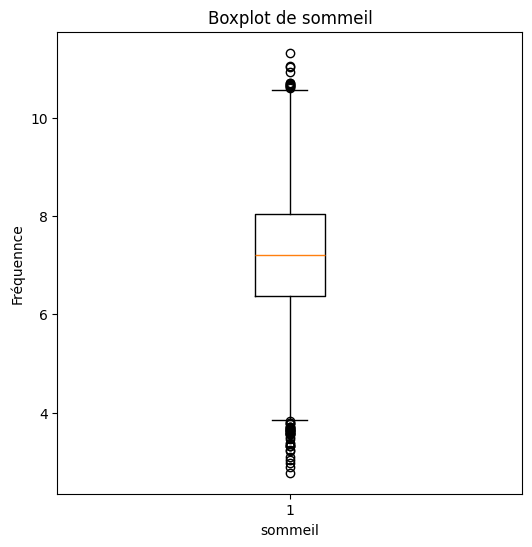

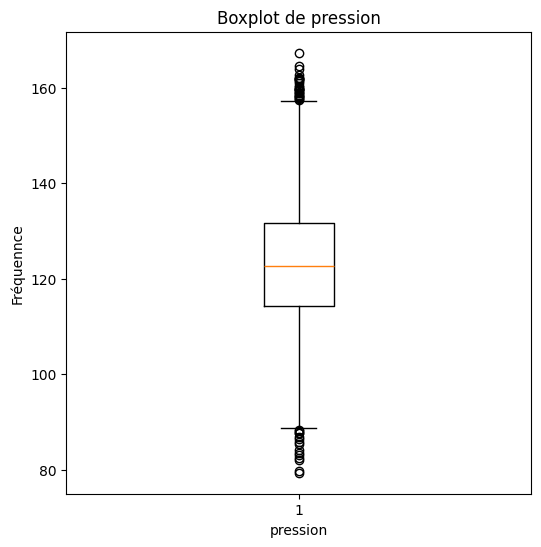

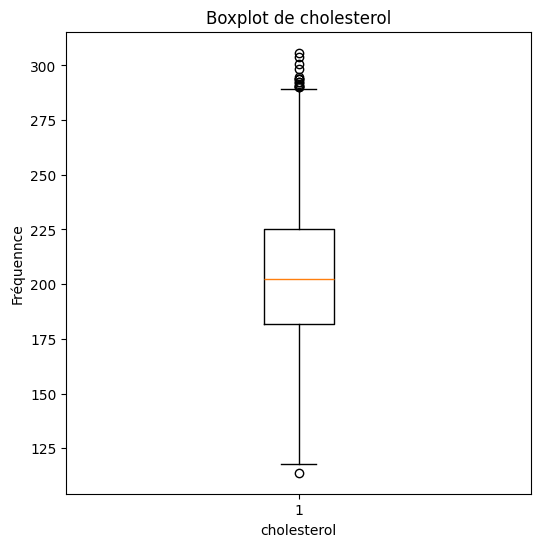

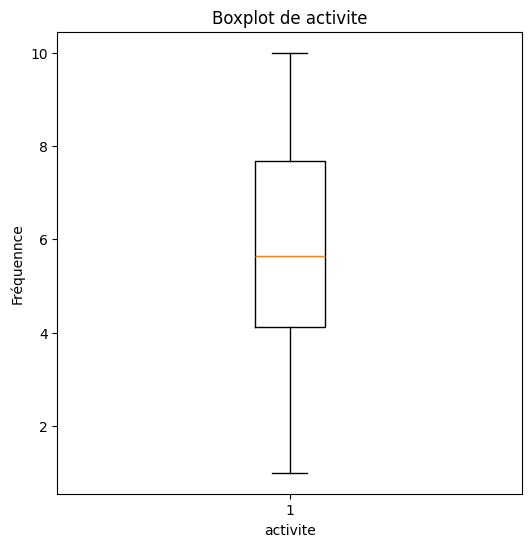

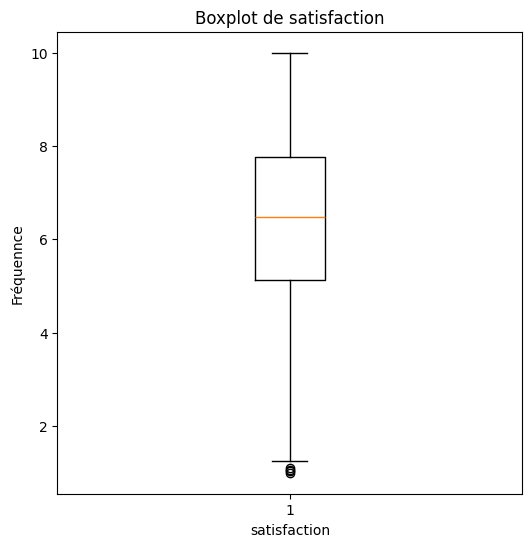

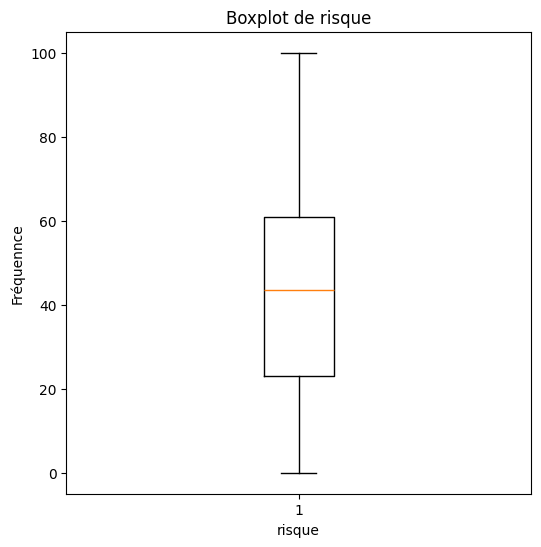

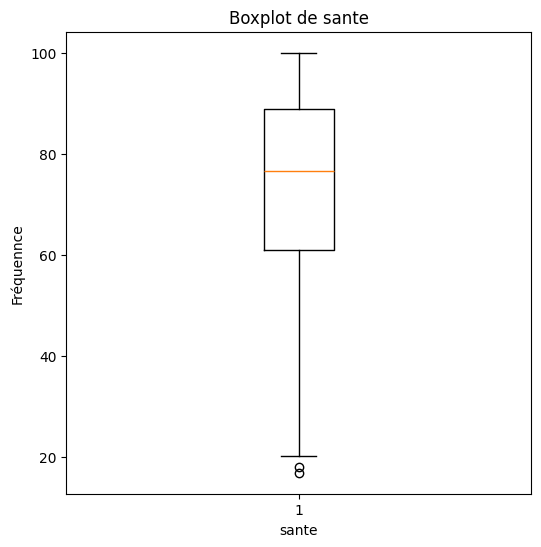

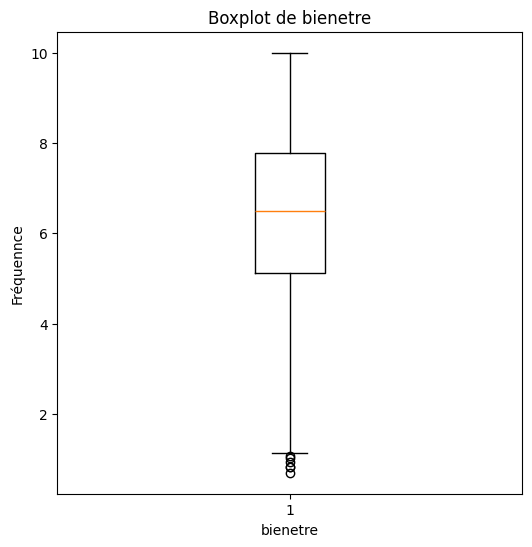

In [11]:
boxplot(df)

# Normalisation de la Donnée

La normalisation permet de ramener les variables à la même échelle de comparaison, afin d’éviter qu’une variable dont la plage de valeurs est plus étendue n’ait un impact disproportionné par rapport aux autres.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
features = df.drop(columns="target")

In [14]:
scaler = StandardScaler()
df_normalise = scaler.fit_transform(features)

In [15]:
df_normalise = pd.DataFrame(df_normalise, columns = features.columns)

[]

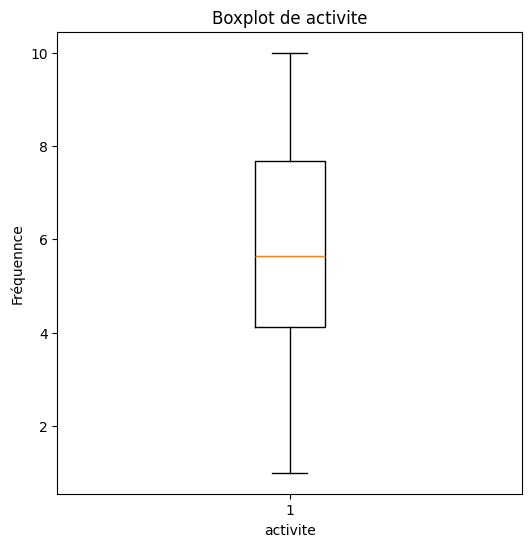

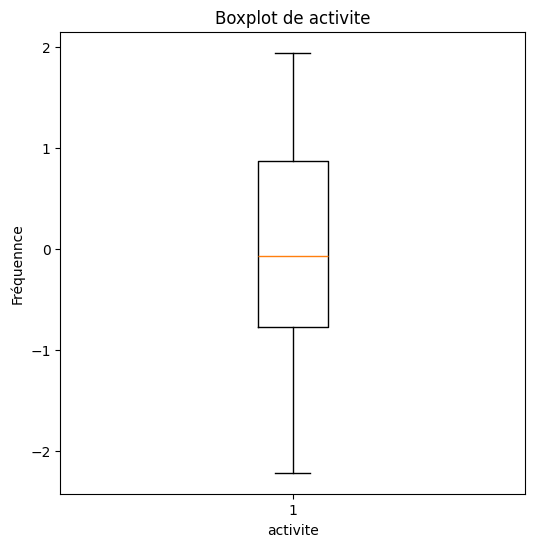

In [16]:
col = "activite"
plt.figure(figsize=(6,6))
plt.boxplot(df[col])
plt.title(f"Boxplot de {col}")
plt.xlabel(col)
plt.ylabel("Fréquennce")
plt.plot()

plt.figure(figsize=(6,6))
plt.boxplot(df_normalise[col])
plt.title(f"Boxplot de {col}")
plt.xlabel(col)
plt.ylabel("Fréquennce")
plt.plot()

[]

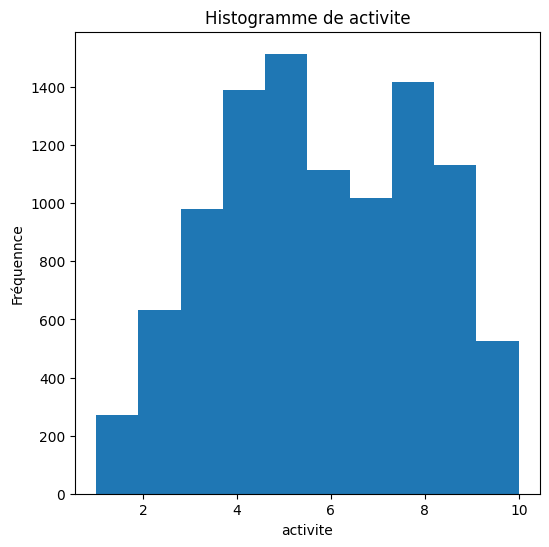

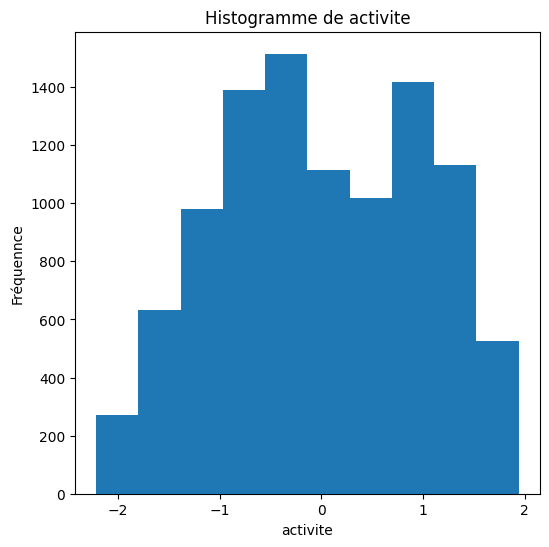

In [17]:
col = "activite"
plt.figure(figsize=(6,6))
plt.hist(df[col])
plt.title(f"Histogramme de {col}")
plt.xlabel(col)
plt.ylabel("Fréquennce")
plt.plot()

plt.figure(figsize=(6,6))
plt.hist(df_normalise[col])
plt.title(f"Histogramme de {col}")
plt.xlabel(col)
plt.ylabel("Fréquennce")
plt.plot()

# Réduction de Dimensionnalité avec la PCA

 La PCA sert à réduire la dimension d’un jeu de données en créant des “super-colonnes” (les composantes principales) à partir des colonnes d’origine. Les variables initiales étant parfois redondantes ou corrélées, la PCA regroupe l’information de ces colonnes pour obtenir de nouvelles variables qui capturent la majeure partie de la variance. Par exemple, si la première composante (PC1) explique 50 % de la variance et la deuxième (PC2) 40 %, on peut réduire un jeu de données de 20 colonnes à seulement 2, tout en conservant environ 90 % de l’information.

<Axes: >

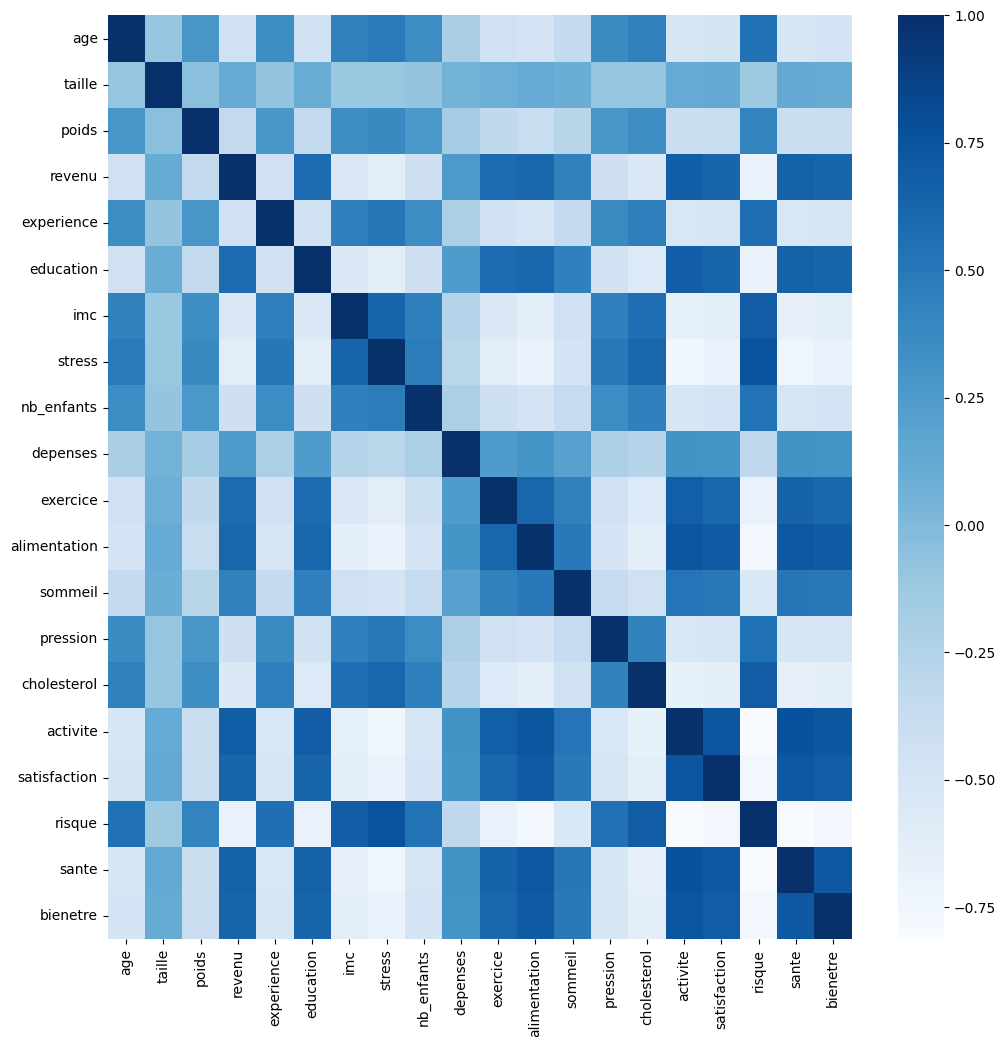

In [18]:
plt.figure(figsize=(12,12))
corr = df_normalise.corr()
sns.heatmap(corr,cmap="Blues")

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
df_normalise_pca = pca.fit_transform(df_normalise)

In [20]:
variance_explique = pca.explained_variance_ratio_
print(f"variance explique :{variance_explique}")

variance explique :[0.52369564 0.04915673 0.04385174 0.03900504 0.03290448 0.03271386
 0.03221717 0.03173034 0.03029981 0.02403423 0.0215965  0.02093654
 0.02067391 0.01877747 0.01559977 0.01539718 0.01475783 0.01287264
 0.0111683  0.00861083]


In [21]:
# Variance expliquée cumulée
variance_cumulee = variance_explique.cumsum()
print(variance_cumulee)

[0.52369564 0.57285237 0.61670411 0.65570915 0.68861363 0.7213275
 0.75354466 0.785275   0.81557481 0.83960904 0.86120553 0.88214207
 0.90281598 0.92159344 0.93719321 0.9525904  0.96734823 0.98022087
 0.99138917 1.        ]


 nb : le plot suivant a été pris sur un forum

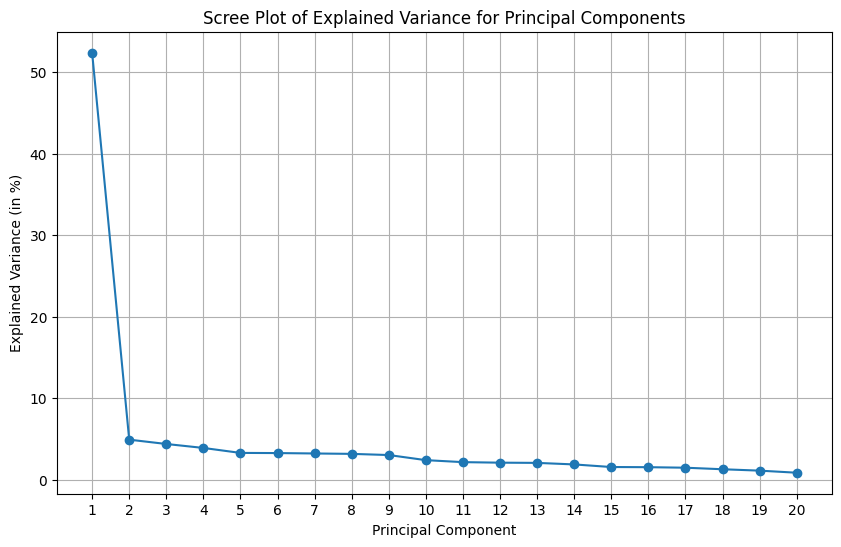

In [22]:
import matplotlib.pyplot as plt

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(variance_explique) + 1), # x-axis
         variance_explique*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(variance_explique) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

## Réduction à deux dimensions (pca = 2)

In [23]:
# réduction a deux composantes principales
pca2 = PCA(n_components=2)
df_noramlise_pca2 = pca2.fit_transform(df_normalise_pca)

In [24]:
# recupération des labels
labels = df['target']

In [25]:
# transformation des deux composantes principales choisies en dataframe
df_noramlise_pca2_ = pd.DataFrame(df_noramlise_pca2, columns = ['PCA1', 'PCA2'])

In [26]:
# concaténations des labels (target) avec mes deux composantes principales choisies
df_concat_pca2 = pd.concat([labels, df_noramlise_pca2_], axis=1)

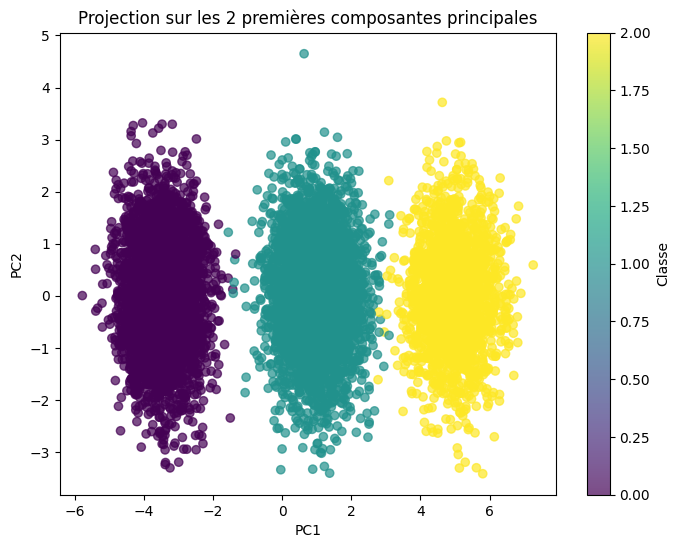

In [27]:
# Visualisation des données projetées sur ces deux axes, avec une coloration en fonction de la classe cible.

plt.figure(figsize=(8, 6))
plt.scatter(df_concat_pca2.PCA1, df_concat_pca2.PCA2, c=df_concat_pca2.target ,cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection sur les 2 premières composantes principales')
plt.colorbar(label='Classe')
plt.show()

## Réduction à trois dimensions (pca = 3)

In [28]:
# réduction à trois composantes principales
pc3 = PCA(n_components=3)

df_noramlise_pca3 = pc3.fit_transform(df_normalise_pca)

# transformation des trois composantes principales choisies en dataframe
df_noramlise_pca3_ = pd.DataFrame(df_noramlise_pca3, columns = ['PCA1', 'PCA2', 'PCA3'])

# concaténations des labels (target) avec mes trois composantes principales choisies
df_concat_pca3 = pd.concat([labels, df_noramlise_pca3_], axis=1)

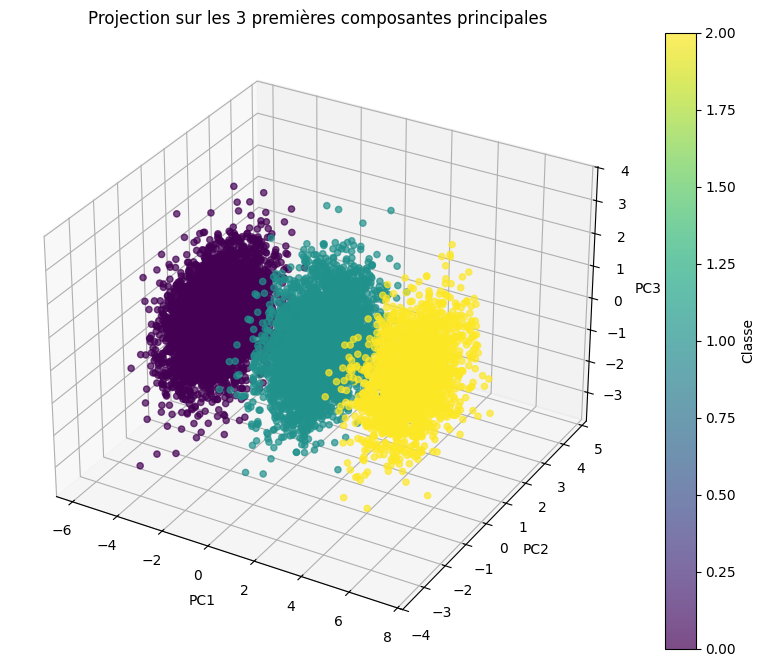

In [29]:
from mpl_toolkits.mplot3d import Axes3D  # Nécessaire pour la projection 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_concat_pca3.PCA1,
    df_concat_pca3.PCA2,
    df_concat_pca3.PCA3,
    c = df_concat_pca3.target,
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection sur les 3 premières composantes principales')

plt.colorbar(sc, label='Classe')

plt.show()


Explication de la variance expliquer de la pca (2D)

pc1 = 0.52369564 indique que la première composante principale explique environ 52% de la variation de notre jeu de données

pc2 = 0.04915673 inndique que la deuxième composante principale explique envirion 4% de la variation de nnotre jeu de données

en bref pc1 explique a lui seul 52% de nos données et pc2 que 4%

## PCA 95% de nos données

In [30]:
# code pour le nom des colonnes
col = []
for i in range(1,17):
  col.append(f"PCA{i}")

In [31]:
# réduction à 16 composantes principales pour avoir 95% de variance cumulative
pc95 = PCA(n_components=16)

df_noramlise_pca95 = pc95.fit_transform(df_normalise_pca)

# transformation des trois composantes principales choisies en dataframe
df_noramlise_pca95_ = pd.DataFrame(df_noramlise_pca95, columns = col)

# concaténations des labels (target) avec mes trois composantes principales choisies
df_concat_pca95 = pd.concat([labels, df_noramlise_pca95_], axis=1)

In [32]:
#Concaténation de mes données juste normalisées avec les labels
df_concat = pd.concat([labels, df_normalise], axis=1)

# Classification Supervisée

## Knn

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Séparation de la target et des variables explicatives
X = df_concat.drop(columns="target")
y = df_concat["target"]

In [39]:
# Création des set train et test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [40]:
# Import du modele
knn = KNeighborsClassifier()

In [52]:
def Appknn(modele, data):
  # Séparation de la target et des variables explicatives
  X = data.drop(columns="target")
  y = data["target"]

  # Création des set train et test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

  # création des paramètres variables pour le GridSearch
  param ={
  "n_neighbors" : range(1,26,2)
  }

  # Création du modèle configurer avec gridsearch et avec ue validation a 5 folds
  grid = GridSearchCV(estimator=modele,
                      param_grid=param,
                      cv=5)

  # entraînement du modèle
  grid.fit(X_train, y_train)

  # Afficher les meilleurs paramètres et le meilleur score
  print("Meilleurs paramètres :", grid.best_params_)
  print("Meilleur score :", grid.best_score_)

  # création du "meilleur modèle" avec les meilleurs paramètres
  best_model = grid.best_estimator_
  # test sur le set test
  y_pred = best_model.predict(X_test)
  # Résultats du test
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Performance modele du meilleur modèle: {accuracy}")

### Sur la donnée normalisée

In [53]:
Appknn(knn, df_concat)

Meilleurs paramètres : {'n_neighbors': 9}
Meilleur score : 0.99975
Performance modele du meilleur modèle: 0.9995


### Sur la pca 2D

In [54]:
Appknn(knn, df_concat_pca2)

Meilleurs paramètres : {'n_neighbors': 19}
Meilleur score : 0.998875
Performance modele du meilleur modèle: 0.999


### Sur la pca 3D

In [55]:
Appknn(knn, df_concat_pca3)

Meilleurs paramètres : {'n_neighbors': 17}
Meilleur score : 0.999125
Performance modele du meilleur modèle: 0.999


### Sur la PCA 95%

In [56]:
Appknn(knn, df_concat_pca95)

Meilleurs paramètres : {'n_neighbors': 5}
Meilleur score : 0.999625
Performance modele du meilleur modèle: 0.9995


## Arbre de décision

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier()

In [57]:
def AppTree(modele, data):
  # Séparation de la target et des variables explicatives
  X = data.drop(columns="target")
  y = data["target"]

  # Création des set train et test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

  # création des paramètres variables pour le GridSearch
  param ={
    "max_depth" : range(1,14,2),
    "min_samples_split" : range(2,10,2),
    "min_samples_leaf" : range(1,10,2)
  }

  # Création du modèle configurer avec gridsearch et avec ue validation a 5 folds
  grid = GridSearchCV(estimator=modele,
                      param_grid=param,
                      cv=5)

  # entraînement du modèle
  grid.fit(X_train, y_train)

  # Afficher les meilleurs paramètres et le meilleur score
  print("Meilleurs paramètres :", grid.best_params_)
  print("Meilleur score :", grid.best_score_)

  # création du "meilleur modèle" avec les meilleurs paramètres
  best_model = grid.best_estimator_
  # test sur le set test
  y_pred = best_model.predict(X_test)
  # Résultats du test
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Performance modele du meilleur modèle: {accuracy}")

### Sur la donnée normalisée

In [58]:
AppTree(tree, df_concat)

Meilleurs paramètres : {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score : 0.9802500000000001
Performance modele du meilleur modèle: 0.974


### Sur la PCA 2D

In [59]:
AppTree(tree, df_concat_pca2)

Meilleurs paramètres : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
Meilleur score : 0.9984999999999999
Performance modele du meilleur modèle: 0.999


### Sur la PCA 3D

In [60]:
AppTree(tree, df_concat_pca3)

Meilleurs paramètres : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score : 0.99825
Performance modele du meilleur modèle: 0.9995


### Sur la PCA 95%

In [61]:
AppTree(tree, df_concat_pca95)

Meilleurs paramètres : {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}
Meilleur score : 0.9985000000000002
Performance modele du meilleur modèle: 0.9995


## K-means

In [62]:
from sklearn.cluster import KMeans

In [63]:
def BestK(data):
  X1 = data.drop(columns="target")
  inertias = []

  # Test k de 1 à 10
  for k in range(1, 11):
      kmeans_test = KMeans(n_clusters=k, init='k-means++', random_state=42)
      kmeans_test.fit(X1)
      inertias.append(kmeans_test.inertia_)

  # Tracer la courbe
  plt.figure(figsize=(6,4))
  plt.plot(range(1, 11), inertias, marker='o')
  plt.title("Méthode du coude")
  plt.xlabel("Nombre de clusters")
  plt.show()

def AppKmeans(data, n):
  X1 = data.drop(columns="target")
  k_optimal = n

  kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
  kmeans.fit(X1)

  # Récupérer le cluster attribué à chaque client
  labels = kmeans.labels_

  # Récupérer la position des centroïdes
  centers = kmeans.cluster_centers_

  plt.figure(figsize=(8,6))

  # Dessiner les points, colorés selon leur cluster
  plt.scatter(X1.iloc[:,0], X1.iloc[:,1],
              c=labels,
              s=30,
              cmap='viridis')

  # Dessiner les centroïdes
  plt.scatter(centers[:, 0], centers[:, 1],
              c='red',
              s=200,
              alpha=0.8,
              marker='X')

  plt.title("Segmentation)")
  plt.show()

PS : le code du plot pour les centroides ont été récupérés sur un forum en ligne

### Sur données normalisé

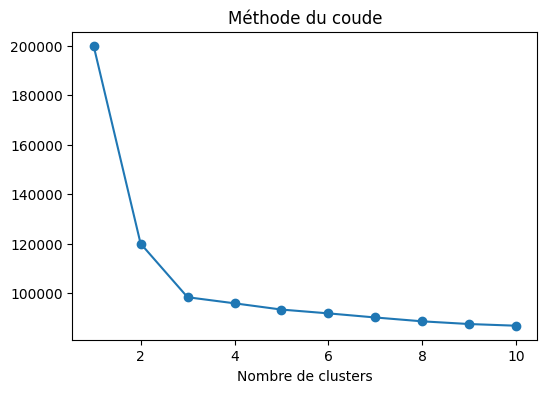

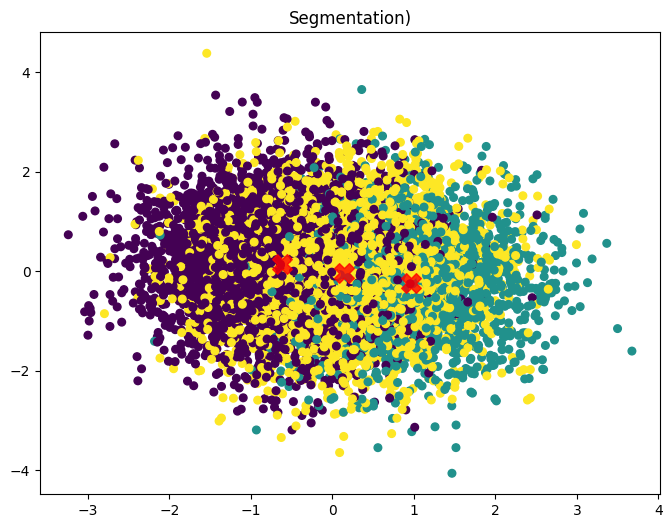

In [64]:
BestK(df_concat)
AppKmeans(df_concat,3)

### Sur PCA 2D

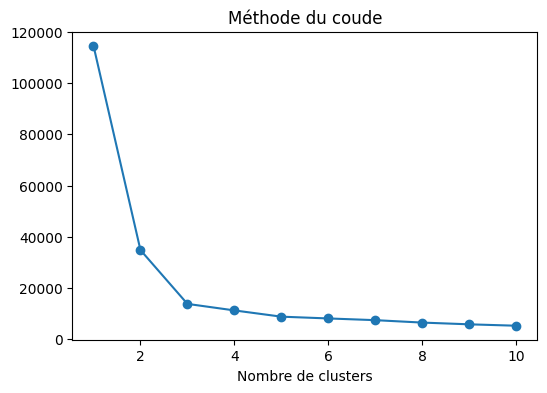

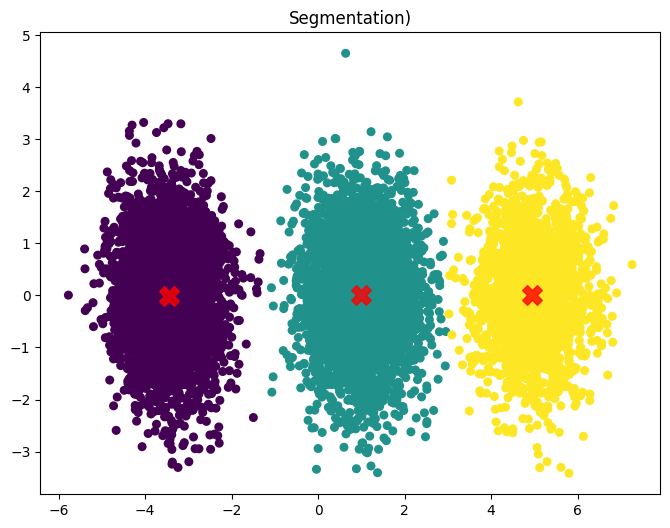

In [66]:
BestK(df_concat_pca2)
AppKmeans(df_concat_pca2,3)

### Sur la PCA 3D

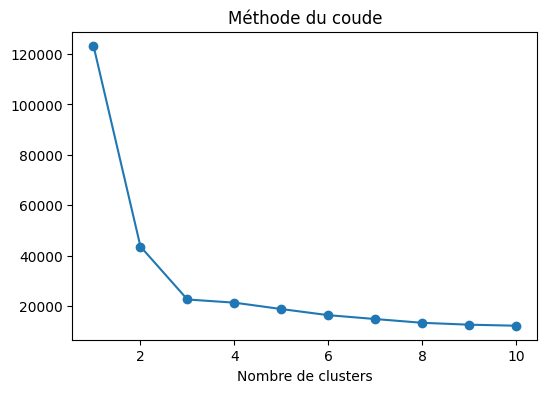

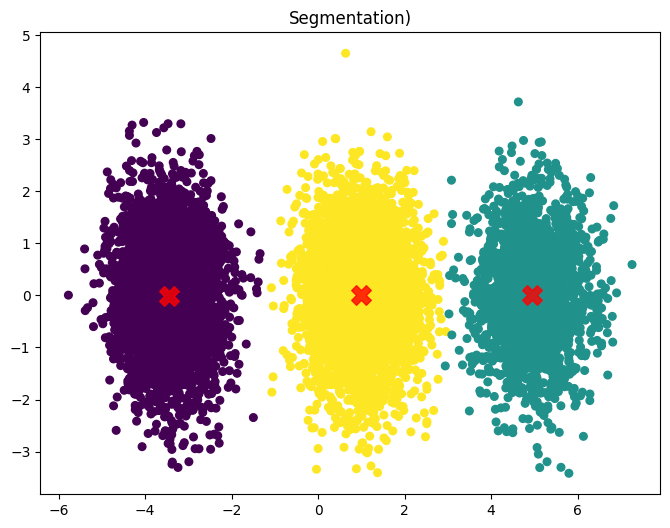

In [67]:
BestK(df_concat_pca3)
AppKmeans(df_concat_pca3,3)

### Sur la PCA 95

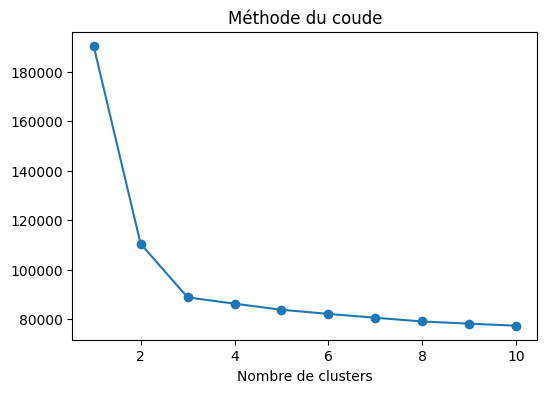

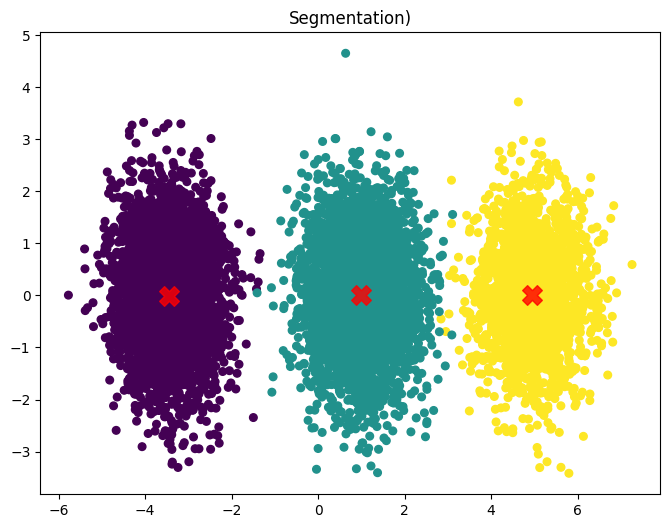

In [68]:
BestK(df_concat_pca95)
AppKmeans(df_concat_pca95,3)

## Regression logistique

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
reglog = LogisticRegression()

In [73]:
def reg(data):
  X = data.drop(columns="target")
  y = data["target"]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

  reglog.fit(X_train, y_train)
  y_pred = reglog.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy : {accuracy}")

  scores = cross_val_score(reglog, X_train, y_train, cv=5)
  print("Scores par fold :", scores)
  print("Score moyen :", scores.mean())

### Sur la données normalisée

In [75]:
reg(df_concat)

accuracy : 0.9995
Scores par fold : [0.999375 1.       1.       0.999375 1.      ]
Score moyen : 0.99975


### Sur la PCA 2D

In [76]:
reg(df_concat_pca2)

accuracy : 0.9985
Scores par fold : [0.998125 0.99875  0.998125 0.99875  0.999375]
Score moyen : 0.998625


### Sur la PCA 3D

In [77]:
reg(df_concat_pca3)

accuracy : 0.999
Scores par fold : [0.998125 0.99875  0.998125 0.99875  0.999375]
Score moyen : 0.998625


### Surla PCA 95%

In [78]:
reg(df_concat_pca95)

accuracy : 0.9995
Scores par fold : [0.99875  1.       1.       0.999375 1.      ]
Score moyen : 0.999625
